In [2]:
# load tool

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
# import decision tree model
NN = MLPClassifier()
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [5]:
df_1 = pd.read_csv("heart.csv")

In [6]:
df_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [7]:
# split data into X and y
X_1 = df_1.drop("condition",axis=1)
y_1= df_1["condition"]

* split into training and testing

In [10]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [11]:
NN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
layer_size = range(1,100,10)
train_scores=[]
test_scores=[]
# loop through layers
for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=1000)
    NN.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(NN.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(NN.score(X1_test,y1_test))
    

In [39]:
train_scores

[0.540084388185654,
 0.8776371308016878,
 0.8860759493670886,
 0.8776371308016878,
 0.8860759493670886,
 0.8860759493670886,
 0.890295358649789,
 0.8860759493670886,
 0.890295358649789,
 0.890295358649789]

In [40]:
test_scores

[0.5333333333333333,
 0.7,
 0.7,
 0.6666666666666666,
 0.75,
 0.7166666666666667,
 0.75,
 0.75,
 0.7166666666666667,
 0.7333333333333333]

Max neural network score on the test data: 75.00%


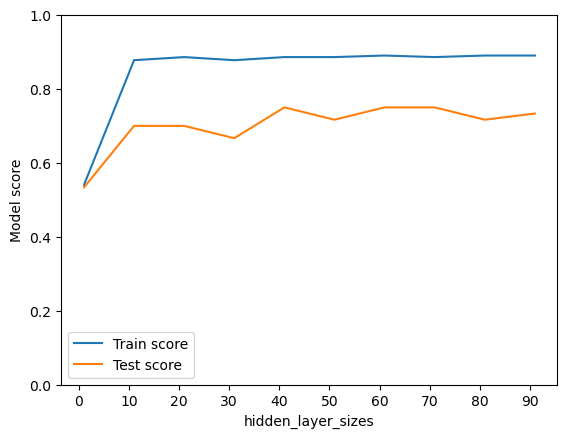

In [44]:
plt.plot(layer_size, train_scores, label="Train score")
plt.plot(layer_size, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(0,100,10))
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Model score")
plt.legend()

print(f"Max neural network score on the test data: {max(test_scores)*100:.2f}%")
# default parameters

In [45]:

f1_train_scores_relu=[]
f1_test_scores_relu=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=1000,activation='relu')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_relu.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_relu.append(f1_score(y1_test,y1_test_pred))
    
    

In [46]:

f1_train_scores_logistic=[]
f1_test_scores_logistic=[]

for i in layer_size:
    NN.set_params(hidden_layer_sizes=i, max_iter=2000,activation='logistic')
    NN.fit(X1_train,y1_train)
    y1_train_pred = NN.predict(X1_train)
    y1_test_pred = NN.predict(X1_test)
    # update the training scores list
    f1_train_scores_logistic.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_logistic.append(f1_score(y1_test,y1_test_pred))


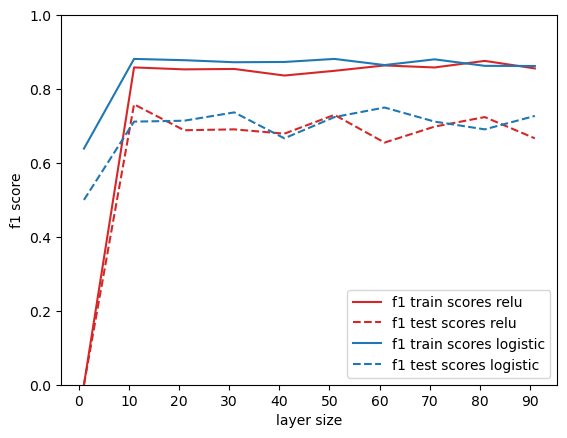

In [47]:
plt.plot(layer_size, f1_train_scores_relu, label="f1 train scores relu",color='C3',)
plt.plot(layer_size, f1_test_scores_relu, label="f1 test scores relu",color='C3', linestyle='--',)
plt.plot(layer_size, f1_train_scores_logistic, label="f1 train scores logistic",color='C0',)
plt.plot(layer_size, f1_test_scores_logistic, label="f1 test scores logistic",color='C0', linestyle='--',)
plt.xticks(np.arange(0,100,10))
plt.ylim(0,1)
plt.xlabel("layer size")
plt.ylabel("f1 score")
plt.legend()



In [64]:
params_grid = {
    'activation': ['identity','logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': range(1,110,10),
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':[0.0001,0.001],
    'max_iter':[5000],
}

In [65]:
grid_search = GridSearchCV(
    estimator=NN,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [66]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 264 candidates, totalling 1056 fits
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.870, test=0.867) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.881) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.427, test=0.508) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.1s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.458, test=0.467) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=sgd;, score=(train=0.376, test=0.322) total time=   0.0s
[CV 3/4] END activation=identity, 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.621, test=0.733) total time=   0.1s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.669, test=0.644) total time=   0.1s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.461, test=0.458) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=1, max_iter=5000, solver=adam;, score=(train=0.596, test=0.644) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.870, test=0.867) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.871, test=0.881) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=11, max_iter=5000, solver=lbf

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.542, test=0.533) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.881) total time=   0.2s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.871, test=0.864) total time=   0.2s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.1s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.740, test=0.767) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.708, test=0.661) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.871, test=0.864) total time=   0.1s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.2s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.712, test=0.767) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.669, test=0.678) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.478, test=0.475) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.663, test=0.712) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=ada

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.539, test=0.542) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.1s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.542, test=0.533) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.461, test=0.458) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.584, test=0.593) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.674, test=0.678) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, sco

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.871, test=0.864) total time=   0.2s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.1s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.684, test=0.717) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.713, test=0.661) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.708, test=0.678) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.674, test=0.678) total time=   0.0s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, sco

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.854, test=0.881) total time=   0.2s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.871, test=0.864) total time=   0.2s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.2s
[CV 1/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.672, test=0.667) total time=   0.0s
[CV 2/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.691, test=0.695) total time=   0.0s
[CV 3/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.534, test=0.475) total time=   0.0s
[CV 4/4] END activation=identity, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, sc

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.797) total time=   1.5s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.548, test=0.517) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.539, test=0.542) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.719, test=0.661) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, score=(train=0.989, test=0.867) total time=   0.3s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=31, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.933, test=0.797) total time=   1.9s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.746) total time=   1.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.780) total time=   1.8s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.548, test=0.533) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.736, test=0.695) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.712) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.994, test=0.850) total time=   0.3s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.921, test=0.733) total time=   2.2s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.695) total time=   1.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.712) total time=   1.7s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.814) total time=   1.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.767) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.729) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.695) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=ada

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.864) total time=   2.3s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.763) total time=   1.0s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.740, test=0.717) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.712) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.729) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=ada

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.712) total time=   2.3s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.927, test=0.847) total time=   1.1s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.797) total time=   2.5s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.717) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.712) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=s

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.767) total time=   2.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.797) total time=   3.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.712) total time=   3.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.994, test=0.712) total time=   2.6s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.751, test=0.750) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.729) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.994, test=0.833) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.783) total time=   3.1s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.763) total time=   2.2s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.847) total time=   2.7s
[CV 4/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.797) total time=   2.1s
[CV 1/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.746, test=0.750) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000,

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.817) total time=   0.8s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.725, test=0.661) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.539, test=0.542) total time=   0.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.780) total time=   0.9s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.740, test=0.700) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.545, test=0.542) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.713, test=0.661) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=sgd;, score=(train=0.539, test=0.542) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, score=(train=0.904, test=0.917) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=11, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.961, test=0.746) total time=   1.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.831) total time=   1.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.927, test=0.746) total time=   1.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.542, test=0.533) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.719, test=0.695) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.719, test=0.593) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.758, test=0.763) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.977, test=0.867) total time=   0.3s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.800) total time=   1.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.831) total time=   1.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.780) total time=   1.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.712) total time=   1.5s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.717) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.712) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.678) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.712) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, score=(train=0.983, test=0.833) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.994, test=0.733) total time=   1.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.729) total time=   1.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.814) total time=   1.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.797) total time=   1.6s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.746, test=0.717) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.736, test=0.712) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.994, test=0.817) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.783) total time=   2.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.678) total time=   2.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.780) total time=   1.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.780) total time=   2.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.763, test=0.750) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.746) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.712) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=0.994, test=0.817) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.750) total time=   2.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.746) total time=   2.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.780) total time=   2.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.994, test=0.746) total time=   2.2s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.717) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.729) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.775, test=0.729) total time=   0.0s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.989, test=0.850) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.977, test=0.833) total time=   2.2s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.797) total time=   1.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.763) total time=   2.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.763) total time=   2.2s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.751, test=0.767) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.712) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.712) total time=   0.0s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.994, test=0.833) total time=   0.4s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.800) total time=   2.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.780) total time=   3.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.763) total time=   2.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.780) total time=   2.5s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.717) total time=   0.0s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.758, test=0.746) total time=   0.0s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.736, test=0.712) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.989, test=0.800) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.850) total time=   3.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.814) total time=   3.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.831) total time=   3.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.729) total time=   3.3s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.750) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.746) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=0.994, test=0.850) total time=   0.5s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, scor

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.850) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.961, test=0.780) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.695) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.763) total time=   4.4s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.751, test=0.750) total time=   0.1s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.746) total time=   0.1s
[CV 3/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.729) total time=   0.1s
[CV 4/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.712) total time=   0.1s
[CV 1/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=0.994, test=0.833) total time=   0.6s
[CV 2/4] END activation=logistic, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.932, test=0.700) total time=   4.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.893, test=0.831) total time=   4.7s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.921, test=0.831) total time=   3.0s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.927, test=0.780) total time=   2.3s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.746, test=0.750) total time=   0.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.712) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.678) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.747, tes

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.938, test=0.767) total time=   5.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.695) total time=   4.9s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.814) total time=   5.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.780) total time=   5.0s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.768, test=0.733) total time=   0.6s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.661) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.695) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.763) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.994, test=0.800) total time=   0.9s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=1.000, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.847) total time=   5.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.961, test=0.814) total time=   5.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.780) total time=   5.7s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.757, test=0.767) total time=   0.2s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.644) total time=   0.5s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.763) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=1.000, test=0.917) total time=   0.8s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=1.000, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.763) total time=   6.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.797) total time=   6.3s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.780) total time=   3.2s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.746, test=0.767) total time=   0.2s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.781, test=0.644) total time=   0.3s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.763) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.729) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=1.000, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.977, test=0.783) total time=   6.5s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.831) total time=   4.8s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.678) total time=   1.5s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.678) total time=   7.1s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.734, test=0.700) total time=   0.4s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.781, test=0.712) total time=   0.3s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.787, t

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.960, test=0.717) total time=   7.1s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.797) total time=   4.4s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.831) total time=   5.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.661) total time=   8.4s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.763, test=0.750) total time=   0.3s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.758, test=0.729) total time=   0.4s
[CV 3/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.4s
[CV 4/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.742, test=0.729) total time=   0.4s
[CV 1/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=1.000, test=0.850) total time=   1.4s
[CV 2/4] END activation=tanh, alpha=0.0001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=1.000

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.938, test=0.767) total time=   1.6s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.629, test=0.610) total time=   0.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.938, test=0.814) total time=   1.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=lbfgs;, score=(train=0.966, test=0.763) total time=   1.9s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.655, test=0.667) total time=   0.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.775, test=0.729) total time=   0.1s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.678) total time=   0.0s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=sgd;, score=(train=0.579, test=0.542) total time=   0.0s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.616, test=0.633) total time=   0.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=21, max_iter=5000, solver=adam;, score=(train=0.978, test=0.797) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.783) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.921, test=0.763) total time=   3.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.916, test=0.797) total time=   3.7s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.797) total time=   2.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.768, test=0.733) total time=   0.3s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.736, test=0.593) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.629, test=0.559) total time=   0.0s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.712) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=31, max_iter=5000, solver=adam;, score=(train=0.994, test=0.850)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.683) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.921, test=0.814) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.695) total time=   3.9s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=lbfgs;, score=(train=0.938, test=0.780) total time=   2.4s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.734, test=0.683) total time=   0.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.661) total time=   0.3s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.610) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.646, test=0.593) total time=   0.0s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=1.000, test=0.850)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.972, test=0.780) total time=   4.4s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=0.921, test=0.864) total time=   2.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.780) total time=   4.3s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.763, test=0.700) total time=   0.3s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.522, test=0.475) total time=   0.0s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.661) total time=   0.1s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.678) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=1.000, test=0.850) total time=   0.7s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=51, max_iter=5000, solver=adam;, score=(train=1.000, test=0.847) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.898, test=0.700) total time=   5.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.797) total time=   5.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.763) total time=   5.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.797) total time=   5.0s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.740, test=0.733) total time=   0.2s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.758, test=0.712) total time=   0.3s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.729) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.695) total time=   0.2s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=0.994, test=0.867) total time=   0.9s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=61, max_iter=5000, solver=adam;, score=(train=1.000, test=0.831) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.800) total time=   5.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.927, test=0.797) total time=   5.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.797) total time=   5.8s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.763) total time=   4.8s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.734, test=0.717) total time=   0.2s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.579, test=0.525) total time=   0.0s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.730, test=0.627) total time=   0.2s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.775, test=0.729) total time=   0.1s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.994, test=0.850)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.955, test=0.767) total time=   6.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.780) total time=   7.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.729) total time=   6.1s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.910, test=0.729) total time=   2.9s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.774, test=0.700) total time=   0.4s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.712) total time=   0.2s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.729) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.661) total time=   0.4s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=1.000, test=0.817)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.683) total time=   6.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.961, test=0.712) total time=   6.6s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.983, test=0.780) total time=   6.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=lbfgs;, score=(train=0.989, test=0.763) total time=   8.3s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.774, test=0.717) total time=   0.5s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.775, test=0.576) total time=   0.3s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.695) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=sgd;, score=(train=0.747, test=0.746) total time=   0.3s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=1.000, test=0.833) total time=   1.0s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=91, max_iter=5000, solver=adam;, score=(train=1.000, test=0.847) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.683) total time=   7.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.814) total time=   7.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=1.000, test=0.780) total time=   7.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=lbfgs;, score=(train=0.978, test=0.763) total time=   7.5s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.768, test=0.717) total time=   0.6s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.610) total time=   0.4s
[CV 3/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.780) total time=   0.3s
[CV 4/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=sgd;, score=(train=0.775, test=0.729) total time=   0.5s
[CV 1/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=1.000, test=0.833) total time=   1.3s
[CV 2/4] END activation=tanh, alpha=0.001, hidden_layer_sizes=101, max_iter=5000, solver=adam;, score=(train=1.000, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.758, test=0.678) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.640, test=0.576) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=sgd;, score=(train=0.770, test=0.712) total time=   0.0s
[CV 1/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.525, test=0.500) total time=   0.0s
[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.663, test=0.695) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.539, test=0.542) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=41, max_iter=5000, solver=adam;, score=(train=0.629, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.899, test=0.847) total time=   0.1s
[CV 3/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.893, test=0.847) total time=   0.2s
[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.949, test=0.746) total time=   0.5s
[CV 1/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.774, test=0.750) total time=   0.0s
[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.669, test=0.695) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.712) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.758, tes

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.944, test=0.746) total time=   0.6s
[CV 1/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.661, test=0.600) total time=   0.0s
[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.719, test=0.610) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.753, test=0.729) total time=   0.0s
[CV 1/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.972, test=0.817) total time=   0.8s
[CV 2/4] END activation=relu, alpha=0.0001, hidden_layer_sizes=81, max_iter=5000, solver=adam;, score=(train=0.944, test=

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.910, test=0.831) total time=   0.2s
[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.539, test=0.542) total time=   0.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=lbfgs;, score=(train=0.904, test=0.814) total time=   0.3s
[CV 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.751, test=0.733) total time=   0.0s
[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.584, test=0.475) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.669, test=0.644) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=sgd;, score=(train=0.691, test=0.678) total time=   0.0s
[CV 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.887, test=0.867) total time=   0.3s
[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=71, max_iter=5000, solver=adam;, score=(train=0.921, test=0.814) 

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.860, test=0.831) total time=   0.1s
[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.876, test=0.881) total time=   0.2s
[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=lbfgs;, score=(train=0.933, test=0.797) total time=   0.4s
[CV 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.746, test=0.733) total time=   0.0s
[CV 2/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.691, test=0.712) total time=   0.0s
[CV 3/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.736, test=0.695) total time=   0.0s
[CV 4/4] END activation=relu, alpha=0.001, hidden_layer_sizes=81, max_iter=5000, solver=sgd;, score=(train=0.764, test=0.746

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=91, max_iter=2000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': range(1, 110, 10),
                         'max_iter': [5000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             return_train_score=True, verbose=5)

In [67]:
res = grid_search.cv_results_


In [68]:
res

{'mean_fit_time': array([8.98492932e-02, 5.49870729e-03, 1.21106684e-01, 1.39191866e-01,
        1.34462118e-02, 4.59565520e-02, 1.99156582e-01, 1.47513151e-02,
        2.96459198e-02, 1.99461699e-01, 8.49813223e-03, 2.76260376e-02,
        2.86845863e-01, 8.51052999e-03, 6.63836598e-02, 3.21537852e-01,
        9.75924730e-03, 6.59257174e-02, 2.91605830e-01, 8.50212574e-03,
        9.88062620e-02, 2.18320847e-01, 9.26971436e-03, 9.00700092e-02,
        3.33061218e-01, 9.89538431e-03, 4.89181876e-02, 3.86943400e-01,
        8.97306204e-03, 7.14095235e-02, 3.33912909e-01, 9.62650776e-03,
        3.41545939e-02, 1.21409714e-01, 1.17014050e-02, 1.41742706e-01,
        1.71827853e-01, 6.54721260e-03, 4.99838591e-03, 2.20187008e-01,
        5.97858429e-03, 2.21683979e-02, 1.31535709e-01, 9.25028324e-03,
        8.10391307e-02, 2.50433445e-01, 1.62531137e-02, 7.33922124e-02,
        2.24968970e-01, 9.25517082e-03, 4.29040194e-02, 3.07201266e-01,
        7.50774145e-03, 4.39205766e-02, 3.40955

In [69]:
grid_search.best_params_

{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': 71,
 'max_iter': 5000,
 'solver': 'adam'}

In [70]:
grid_search.score(X1_test,y1_test)

0.75

In [71]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

In [72]:
from sklearn.model_selection import learning_curve, validation_curve

In [73]:
NN_best = MLPClassifier(activation='identity', alpha=0.0001, hidden_layer_sizes = 71, max_iter=5000, solver='adam')

In [74]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=NN_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

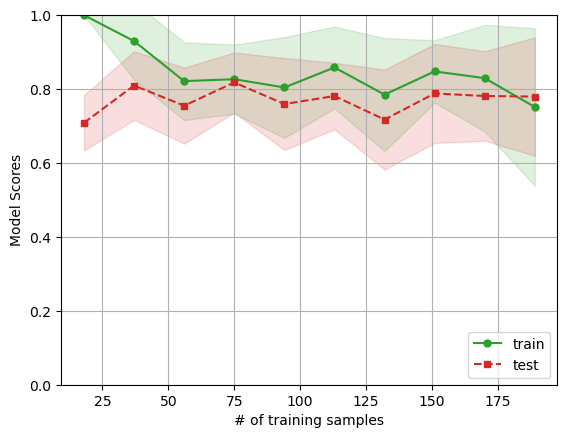

In [75]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1)
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

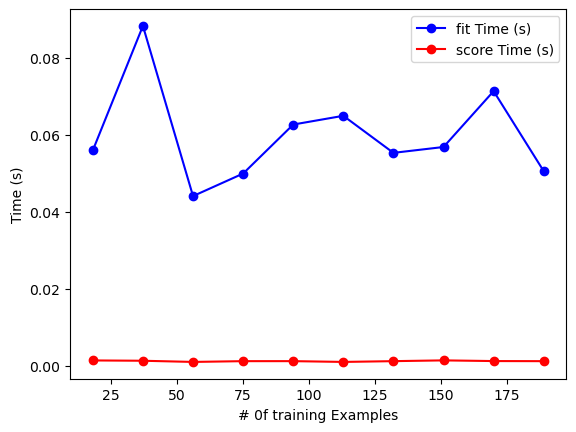

In [76]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()